In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import folium
pd.options.display.max_rows = 999

In [2]:
data = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Datos/2017_aforament_detall_valor-trafico.csv')

In [3]:
data.isnull().sum()

Any               0
Id_aforament      0
Mes               0
Codi_tipus_dia    0
Desc_tipus_dia    0
Valor_IMD         0
dtype: int64

In [4]:
data.head(2)

,Any,Id_aforament,Mes,Codi_tipus_dia,Desc_tipus_dia,Valor_IMD
0,2017,1001,1,1,Dilluns,33986
1,2017,1001,1,2,Laborable,35184


In [5]:
data.columns


Index(['Any', 'Id_aforament', 'Mes', 'Codi_tipus_dia', 'Desc_tipus_dia',
       'Valor_IMD'],
      dtype='object')

In [6]:
data1 = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Datos/2018_aforament_descripcio-trafico.csv')

In [7]:
data1.columns

Index(['Id_aforament', 'Desc_aforament', 'Codi_tipus_aforament',
       'Desc_tipus_aforament', 'Num_carrils', 'Codi_districte', 'Codi_barri',
       'Codi_tipus_equip_mesura', 'Desc_tipus_equip_mesura', 'Longitud',
       'Latitud', 'X_ETRS89', 'Y_ETRS89'],
      dtype='object')

In [8]:
data1['Desc_tipus_equip_mesura'].unique()

array(['Espira', 'Infraroig', 'Visió Artificial', nan], dtype=object)

In [9]:
data1.isnull().sum()

Id_aforament               0
Desc_aforament             0
Codi_tipus_aforament       0
Desc_tipus_aforament       0
Num_carrils                0
Codi_districte             0
Codi_barri                 0
Codi_tipus_equip_mesura    4
Desc_tipus_equip_mesura    4
Longitud                   0
Latitud                    0
X_ETRS89                   0
Y_ETRS89                   0
dtype: int64

In [10]:
data1.dropna(inplace=True)

In [11]:
data1.isnull().sum()

Id_aforament               0
Desc_aforament             0
Codi_tipus_aforament       0
Desc_tipus_aforament       0
Num_carrils                0
Codi_districte             0
Codi_barri                 0
Codi_tipus_equip_mesura    0
Desc_tipus_equip_mesura    0
Longitud                   0
Latitud                    0
X_ETRS89                   0
Y_ETRS89                   0
dtype: int64

In [12]:
data1.columns

Index(['Id_aforament', 'Desc_aforament', 'Codi_tipus_aforament',
       'Desc_tipus_aforament', 'Num_carrils', 'Codi_districte', 'Codi_barri',
       'Codi_tipus_equip_mesura', 'Desc_tipus_equip_mesura', 'Longitud',
       'Latitud', 'X_ETRS89', 'Y_ETRS89'],
      dtype='object')

In [13]:
data1.head(200)

,Id_aforament,Desc_aforament,Codi_tipus_aforament,Desc_tipus_aforament,Num_carrils,Codi_districte,Codi_barri,Codi_tipus_equip_mesura,Desc_tipus_equip_mesura,Longitud,Latitud,X_ETRS89,Y_ETRS89
0,10001,ARAGÓ - NAVAS (Llobregat),1,Trànsit,2,10,65,1.0,Espira,2.190735,41.411680,432364.55,4584775.02
1,10002,BAC DE RODA - BOLIVIA (Pujada),1,Trànsit,3,10,71,1.0,Espira,2.198983,41.411337,433053.50,4584730.52
2,10005,ARAGÓ - BILBAO (Besòs),1,Trànsit,2,10,65,1.0,Espira,2.191886,41.412286,432461.33,4584841.41
3,10007,CANTÀBRIA - GUIPÚSCOA (Baixada),1,Trànsit,2,10,72,1.0,Espira,2.201899,41.419286,433305.33,4585610.78
4,10008,CANTÀBRIA - GUIPÚSCOA (Pujada),1,Trànsit,2,10,72,1.0,Espira,2.201063,41.420043,433236.31,4585695.52
5,10009,GUIPÚSCOA - MARESME (Llobregat),1,Trànsit,2,10,73,1.0,Espira,2.203021,41.420926,433400.83,4585792.00
6,10010,GUIPÚSCOA - PUIGCERDÀ (Besós),1,Trànsit,2,10,73,1.0,Espira,2.203240,41.420792,433419.00,4585776.91
7,10011,RBLA. PRIM - CONCILI DE TRENTO (Baixada),1,Trànsit,2,10,73,1.0,Espira,2.206291,41.420903,433674.02,4585786.90
8,10012,RBLA. PRIM - CONCILI DE TRENTO (Pujada),1,Trànsit,2,10,73,1.0,Espira,2.205820,41.421791,433635.62,4585885.89
9,10013,RBLA. PRIM - CRISTÓBAL DE MOURA (Baixada),1,Trànsit,2,10,70,1.0,Espira,2.213463,41.415435,434267.81,4585174.37


In [14]:
data1.shape

(687, 13)

In [15]:
data1

,Id_aforament,Desc_aforament,Codi_tipus_aforament,Desc_tipus_aforament,Num_carrils,Codi_districte,Codi_barri,Codi_tipus_equip_mesura,Desc_tipus_equip_mesura,Longitud,Latitud,X_ETRS89,Y_ETRS89
0,10001,ARAGÓ - NAVAS (Llobregat),1,Trànsit,2,10,65,1.0,Espira,2.190735,41.411680,432364.55,4584775.02
1,10002,BAC DE RODA - BOLIVIA (Pujada),1,Trànsit,3,10,71,1.0,Espira,2.198983,41.411337,433053.50,4584730.52
2,10005,ARAGÓ - BILBAO (Besòs),1,Trànsit,2,10,65,1.0,Espira,2.191886,41.412286,432461.33,4584841.41
3,10007,CANTÀBRIA - GUIPÚSCOA (Baixada),1,Trànsit,2,10,72,1.0,Espira,2.201899,41.419286,433305.33,4585610.78
4,10008,CANTÀBRIA - GUIPÚSCOA (Pujada),1,Trànsit,2,10,72,1.0,Espira,2.201063,41.420043,433236.31,4585695.52
5,10009,GUIPÚSCOA - MARESME (Llobregat),1,Trànsit,2,10,73,1.0,Espira,2.203021,41.420926,433400.83,4585792.00
6,10010,GUIPÚSCOA - PUIGCERDÀ (Besós),1,Trànsit,2,10,73,1.0,Espira,2.203240,41.420792,433419.00,4585776.91
7,10011,RBLA. PRIM - CONCILI DE TRENTO (Baixada),1,Trànsit,2,10,73,1.0,Espira,2.206291,41.420903,433674.02,4585786.90
8,10012,RBLA. PRIM - CONCILI DE TRENTO (Pujada),1,Trànsit,2,10,73,1.0,Espira,2.205820,41.421791,433635.62,4585885.89
9,10013,RBLA. PRIM - CRISTÓBAL DE MOURA (Baixada),1,Trànsit,2,10,70,1.0,Espira,2.213463,41.415435,434267.81,4585174.37


In [16]:
data1['Desc_tipus_aforament'].unique()

array(['Trànsit', 'Rondes', 'Bicis'], dtype=object)

In [17]:
la = data1[['Latitud']]
lo= data1[['Longitud']]

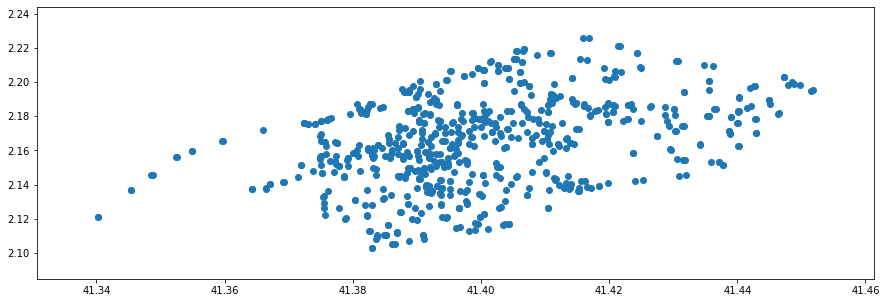

In [18]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))
ax.scatter(x=la , y=lo)
plt.show()

In [19]:
mapa= folium.Map(location=[41.3852408, 2.1770164], zoom_start= 12, control_scale= True, tiles= 'Stamen Terrain')

In [20]:
mapa

In [21]:
data1.columns

Index(['Id_aforament', 'Desc_aforament', 'Codi_tipus_aforament',
       'Desc_tipus_aforament', 'Num_carrils', 'Codi_districte', 'Codi_barri',
       'Codi_tipus_equip_mesura', 'Desc_tipus_equip_mesura', 'Longitud',
       'Latitud', 'X_ETRS89', 'Y_ETRS89'],
      dtype='object')

In [22]:
data1[['Longitud', 'Latitud']]

,Longitud,Latitud
0,2.190735,41.411680
1,2.198983,41.411337
2,2.191886,41.412286
3,2.201899,41.419286
4,2.201063,41.420043
5,2.203021,41.420926
6,2.203240,41.420792
7,2.206291,41.420903
8,2.205820,41.421791
9,2.213463,41.415435


In [23]:
la= data1['Longitud']
lo= data1['Latitud']

In [24]:
la

0      2.190735
1      2.198983
2      2.191886
3      2.201899
4      2.201063
5      2.203021
6      2.203240
7      2.206291
8      2.205820
9      2.213463
10     2.212745
11     2.192147
12     2.208423
13     2.208669
14     2.207930
15     2.109525
16     2.139966
17     2.116364
18     2.116258
19     2.139898
20     2.123801
21     2.123738
22     2.126378
23     2.127639
24     2.128577
25     2.128631
26     2.110685
27     2.120020
28     2.135916
29     2.143078
30     2.110724
31     2.113053
32     2.108485
33     2.112958
34     2.110548
35     2.119150
36     2.110687
37     2.123704
38     2.120166
39     2.120261
40     2.121848
41     2.121997
42     2.128171
43     2.128104
44     2.145602
45     2.145255
46     2.155229
47     2.154168
48     2.154498
49     2.153437
50     2.137722
51     2.140756
52     2.138282
53     2.158381
54     2.158203
55     2.153427
56     2.153503
57     2.105337
58     2.105554
59     2.116930
60     2.116940
61     2.142915
62     2

In [25]:
data1.columns= data1.columns.str.strip()

In [26]:
data1.columns

Index(['Id_aforament', 'Desc_aforament', 'Codi_tipus_aforament',
       'Desc_tipus_aforament', 'Num_carrils', 'Codi_districte', 'Codi_barri',
       'Codi_tipus_equip_mesura', 'Desc_tipus_equip_mesura', 'Longitud',
       'Latitud', 'X_ETRS89', 'Y_ETRS89'],
      dtype='object')

In [27]:
mapa= folium.Map(location=[41.3852408, 2.1770164], zoom_start= 12, control_scale= True, attr='Mapbox attribution')
marcador1 = folium.Marker(location=(41.398722, 2.153399), popup= 'Gràcia', icon=folium.Icon(color="red"))
marcador2 = folium.Marker(location= (41.378783, 2.133099), popup = 'Sants' ,icon=folium.Icon(color="red"))
marcador3= folium.Marker(location=(41.385314, 2.153800), popup = 'Eixample', icon=folium.Icon(color="red"))
marcador1.add_to(mapa)
marcador2.add_to(mapa)
marcador3.add_to(mapa)
mapa

In [28]:
data1.columns

Index(['Id_aforament', 'Desc_aforament', 'Codi_tipus_aforament',
       'Desc_tipus_aforament', 'Num_carrils', 'Codi_districte', 'Codi_barri',
       'Codi_tipus_equip_mesura', 'Desc_tipus_equip_mesura', 'Longitud',
       'Latitud', 'X_ETRS89', 'Y_ETRS89'],
      dtype='object')

In [29]:
data1['Latitud'].count()

687

In [30]:
subset_of_data1= data1.sample(600)

In [31]:
subset_of_data1

,Id_aforament,Desc_aforament,Codi_tipus_aforament,Desc_tipus_aforament,Num_carrils,Codi_districte,Codi_barri,Codi_tipus_equip_mesura,Desc_tipus_equip_mesura,Longitud,Latitud,X_ETRS89,Y_ETRS89
529,5019,TRAFALGAR - MENDEZ NÚÑEZ,1,Trànsit,2,1,4,1.0,Espira,2.177868,41.390288,431266.62,4582410.21
258,20144,AV. DIAGONAL - MARINA,2,Bicis,1,2,6,1.0,Espira,2.177224,41.400797,431223.80,4583577.49
288,20171,NAVAS DE TOLOSA- MURCIA (MAR),2,Bicis,1,9,63,1.0,Espira,2.188255,41.414307,432160.00,4585068.66
335,20221,MINERIA - PSG. ZONA FRANCA,2,Bicis,1,3,13,1.0,Espira,2.137425,41.364317,427856.71,4579559.87
114,17005,AV. DIAGONAL - PERE IV (Pujada),1,Trànsit,2,10,68,1.0,Espira,2.200160,41.406740,433147.15,4584219.31
461,4066,GIRONA - CONSELL DE CENT,1,Trànsit,2,2,7,1.0,Espira,2.170492,41.395295,430655.29,4582971.98
117,17008,PG. VALL D'HEBRON - C. DE TICIÀ (LLOBREGAT),1,Trànsit,2,10,68,1.0,Espira,2.138465,41.416558,428001.32,4585358.76
431,4035,GRAN VIA - PL. UNIVERSITAT,1,Trànsit,4,2,8,1.0,Espira,2.164417,41.386536,430138.04,4582004.53
303,20187,PSG. DEL TAULAT - LLACUNA,2,Bicis,1,10,68,1.0,Espira,2.203211,41.397389,433392.66,4583178.82
682,9002,AV. D'ICÀRIA - TRIAS FARGAS (Besòs),1,Trànsit,1,10,67,1.0,Espira,2.193873,41.388408,432602.72,4582188.95


In [32]:
some_map= folium.Map(location=[subset_of_data1['Latitud'].mean(), subset_of_data1['Longitud'].mean()], zoom_start= 11)

In [33]:
for row in subset_of_data1.itertuples():
    
    some_map.add_child(folium.Marker(location= [row.Latitud, row.Longitud],popup=row.Id_aforament))

In [34]:
some_map

In [35]:
from folium.plugins import MarkerCluster

In [36]:
some_map2 = folium.Map(location=[subset_of_data1['Latitud'].mean(), subset_of_data1['Longitud'].mean()], zoom_start= 11)

In [37]:
mc= MarkerCluster()

In [38]:
for row in subset_of_data1.itertuples():
    
    mc.add_child(folium.Marker(location= [row.Latitud, row.Longitud],popup=row.Id_aforament))

In [39]:
some_map2.add_child(mc)

In [40]:
marcador1 = folium.Marker(location=(41.398722, 2.153399),popup= 'Gràcia', icon=folium.Icon(color="red"))
marcador2 = folium.Marker(location= (41.378783, 2.133099), popup= 'Sants', icon=folium.Icon(color="red"))
marcador3= folium.Marker(location=(41.385314, 2.153800),popup= 'Eixample', icon=folium.Icon(color="red"))
marcador4= folium.Marker(location=(41.41843, 2.12388),popup= 'Fabra', icon=folium.Icon(color="blue"))
marcador5= folium.Marker(location=(41.38943, 2.18847),popup= 'Zoo', icon=folium.Icon(color="blue"))
marcador6= folium.Marker(location=(41.37919, 2.1054),popup= 'Zona Universitaria', icon=folium.Icon(color="blue"))
marcador7= folium.Marker(location=(41.3839, 2.16775),popup= 'El Raval', icon=folium.Icon(color="blue"))
circulo = folium.Circle([41.398722, 2.153399], radius=270, popup='Gràcia', color='red').add_to(some_map2)
circulo_2= folium.Circle([41.378783, 2.133099], radius=270, popup='Sants', color='blue').add_to(some_map2)
circulo_3= folium.Circle([41.385314, 2.153800], radius=270, popup='Eixample', color='green').add_to(some_map2)
circulo_4= folium.Circle([41.41843, 2.12388], radius=3000, popup='Eixample', color='brown').add_to(some_map2)
circulo_5= folium.Circle([41.38943, 2.18847], radius=3000, popup='Eixample', color='black').add_to(some_map2)
circulo_6= folium.Circle([41.37919, 2.1054], radius=3000, popup='Eixample', color='orange').add_to(some_map2)
circulo_7= folium.Circle([41.3839, 2.16775], radius=3000, popup='Eixample', color='purple').add_to(some_map2)
marcador1.add_to(some_map2)
marcador2.add_to(some_map2)
marcador3.add_to(some_map2)
marcador4.add_to(some_map2)
marcador5.add_to(some_map2)
marcador6.add_to(some_map2)
marcador7.add_to(some_map2)

In [41]:
some_map2

In [42]:
!conda list

# packages in environment at /home/marc/[/Usuarios/marcj/Descargas]/envs/masterds:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_pytorch_select           0.2                       gpu_0  
_tflow_select             2.1.0                       gpu  
absl-py                   0.9.0                    py37_0  
affine                    2.3.0                    pypi_0    pypi
astor                     0.8.0                    py37_0  
attrs                     19.3.0                     py_0  
backcall                  0.1.0                    py37_0  
blas                      1.0                         mkl  
bleach                    3.1.0                    py37_0  
blis                      0.4.1                    pypi_0    pypi
boto                      2.49.0                   pypi_0    pypi
boto3                     1.12.20                  pypi_0    pypi
botocore                  1.15.20           

In [43]:
some_map2

In [44]:
import geopandas as gpd

In [45]:
some_map2.save('mapa bcn.html')